In [1]:
import pandas_datareader as web
import datetime
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math
import seaborn as sns
import pandas_ta

In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 12, 31)
df_visa = web.DataReader('V', 'yahoo', start, end) 
df_visa.head()
df_visa.count()

High         1763
Low          1763
Open         1763
Close        1763
Volume       1763
Adj Close    1763
dtype: int64

In [3]:
df_visa.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,55.507500,54.875000,55.384998,55.252499,10654000.0,52.239887
2014-01-03,55.622501,55.057499,55.437500,55.290001,7809600.0,52.275352
2014-01-06,55.577499,54.897499,55.294998,54.957500,8577600.0,51.960976
2014-01-07,55.527500,55.115002,55.187500,55.377499,8178000.0,52.358078
2014-01-08,55.750000,55.160000,55.355000,55.555000,8487200.0,52.525898


In [4]:
df_visa.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1763.000000,1763.000000,1763.000000,1763.000000,1.763000e+03,1763.000000
mean,114.613834,112.620452,113.648480,113.647031,9.089668e+06,110.843389
std,50.011632,48.939193,49.496348,49.485043,4.391113e+06,49.692828
min,50.000000,48.709999,49.272499,49.157501,2.188800e+06,46.560986
25%,72.605000,71.109997,71.950001,71.925003,6.374850e+06,68.988251
50%,96.220001,95.099998,95.800003,95.790001,8.002500e+06,92.930862
75%,157.035004,153.334999,155.230003,154.815002,1.049755e+07,152.280670
max,220.389999,216.199997,218.399994,218.729996,5.085760e+07,217.041489


In [5]:
df_visa_test = df_visa[1410:]
df_visa = df_visa[:1410]

In [6]:
# Keep only the 'Adj Close' Value
df_visa = df_visa[['Adj Close']]
# Re-inspect data
df_visa.head()

,Adj Close
Date,
2014-01-02,52.239887
2014-01-03,52.275352
2014-01-06,51.960976
2014-01-07,52.358078
2014-01-08,52.525898


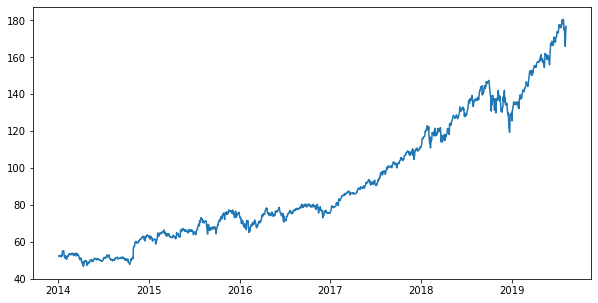

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df_visa)

In [8]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df_visa.ta.ema(close='Adj close', length=10, append=True)

Date
2014-01-02           NaN
2014-01-03           NaN
2014-01-06           NaN
2014-01-07           NaN
2014-01-08           NaN
                 ...    
2019-08-02    176.919524
2019-08-05    174.936597
2019-08-06    173.961284
2019-08-07    173.670962
2019-08-08    174.252114
Name: EMA_10, Length: 1410, dtype: float64

In [9]:
# inspect the dataframe
df_visa.head(15)

,Adj Close,EMA_10
Date,,
2014-01-02,52.239887,NaN
2014-01-03,52.275352,NaN
2014-01-06,51.960976,NaN
2014-01-07,52.358078,NaN
2014-01-08,52.525898,NaN
2014-01-09,52.452618,NaN
2014-01-10,52.268253,NaN
2014-01-13,51.741150,NaN
2014-01-14,52.627537,NaN


In [10]:
# Drop the first n-rows
df_visa = df_visa.iloc[9:]
# View our newly-formed dataset
df_visa.head(10)

,Adj Close,EMA_10
Date,,
2014-01-15,52.889900,52.333965
2014-01-16,52.419529,52.349522
2014-01-17,54.880135,52.809633
2014-01-21,54.821026,53.175341
2014-01-22,55.071587,53.520113
2014-01-23,53.951202,53.598493
2014-01-24,52.296623,53.361789
2014-01-27,51.107674,52.951950
2014-01-28,52.228077,52.820337


In [11]:
df_visa["Adj Close"] = df_visa["Adj Close"].shift(-1)
df_visa.dropna(inplace=True)

In [12]:
df_visa.head()

,Adj Close,EMA_10
Date,,
2014-01-15,52.419529,52.333965
2014-01-16,54.880135,52.349522
2014-01-17,54.821026,52.809633
2014-01-21,55.071587,53.175341
2014-01-22,53.951202,53.520113


In [13]:
from sklearn.model_selection import train_test_split
# Split data into testing and training sets
X_train, X_valid, y_train, y_valid = train_test_split(df_visa[['EMA_10']], df_visa[['Adj Close']], test_size=.2)

In [14]:
# Training set
X_train.describe()

,EMA_10
count,1120.000000
mean,91.718666
std,33.834864
min,48.430242
25%,65.928758
50%,78.381609
75%,118.887202
max,178.362568


In [15]:
# Test set
X_valid.describe()

,EMA_10
count,280.000000
mean,90.315952
std,35.109562
min,48.863268
25%,63.365724
50%,76.755661
75%,116.681739
max,178.382068


In [16]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(1120, 1) (1120, 1) (280, 1) (280, 1)


In [17]:
class RidgeRegression(object):
    def __init__(self, lmbda=0.1):
        self.lmbda = lmbda

    def fit(self, X, y):
        C = X.T.dot(X) + self.lmbda*np.eye(X.shape[1])
        self.w = np.linalg.inv(C).dot(X.T.dot(y))

    def predict(self, X):
        return X.dot(self.w)

    def get_params(self, deep=True):
        return {"lmbda": self.lmbda}

    def set_params(self, lmbda=0.1):
        self.lmbda = lmbda
        return self

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
ridge = RidgeRegression()
param_grid = [{"lmbda": 2.0**np.arange(-5, 10)}]
learner = GridSearchCV(ridge, param_grid, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=0)
learner.fit(X_train, y_train)

y_pred = learner.predict(X_valid)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
ridge_error = mean_squared_error(y_valid, y_pred)
sqrt(ridge_error)
print("R squared", r2_score(y_valid, y_pred))
print("RMSE",sqrt(ridge_error))

R squared 0.997800816477207
RMSE 1.6593962355711227


In [20]:
# Interpretation

In [21]:
df_visa_test

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-09,180.100006,177.850006,179.669998,179.050003,5373700.0,176.031631
2019-08-12,178.649994,175.600006,177.440002,176.339996,7394400.0,173.367310
2019-08-13,178.919998,174.210007,174.389999,178.610001,6667700.0,175.599060
2019-08-14,177.250000,173.160004,176.240005,173.509995,7293500.0,170.585007
2019-08-15,177.020004,173.520004,174.259995,176.270004,6698000.0,173.548553
...,...,...,...,...,...,...
2020-12-24,208.820007,206.600006,206.639999,208.699997,3367900.0,207.088928
2020-12-28,213.460007,208.949997,209.850006,212.630005,5816200.0,210.988602
2020-12-29,215.240005,213.539993,214.610001,214.369995,6093400.0,212.715149


In [22]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df_visa_test.ta.ema(close='Adj close', length=10, append=True)

Date
2019-08-09           NaN
2019-08-12           NaN
2019-08-13           NaN
2019-08-14           NaN
2019-08-15           NaN
                 ...    
2020-12-24    206.659522
2020-12-28    207.446628
2020-12-29    208.404541
2020-12-30    209.908142
2020-12-31    211.205114
Name: EMA_10, Length: 353, dtype: float64

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
df_visa_test

,High,Low,Open,Close,Volume,Adj Close,EMA_10
Date,,,,,,,
2019-08-09,180.100006,177.850006,179.669998,179.050003,5373700.0,176.031631,NaN
2019-08-12,178.649994,175.600006,177.440002,176.339996,7394400.0,173.367310,NaN
2019-08-13,178.919998,174.210007,174.389999,178.610001,6667700.0,175.599060,NaN
2019-08-14,177.250000,173.160004,176.240005,173.509995,7293500.0,170.585007,NaN
2019-08-15,177.020004,173.520004,174.259995,176.270004,6698000.0,173.548553,NaN
2019-08-16,178.750000,177.199997,178.000000,178.229996,8312200.0,175.478287,NaN
2019-08-19,180.419998,178.119995,180.419998,179.740005,5285000.0,176.964966,NaN
2019-08-20,180.630005,178.490005,179.429993,179.240005,3793600.0,176.472687,NaN
2019-08-21,181.690002,180.240005,180.690002,180.940002,3695900.0,178.146454,NaN


In [25]:
df_visa_test = df_visa_test[9:]

In [26]:
df_visa_test["Adj Close"] = df_visa_test["Adj Close"].shift(-1)
df_visa_test.dropna(inplace=True)

In [27]:
df_visa_test

,High,Low,Open,Close,Volume,Adj Close,EMA_10
Date,,,,,,,
2019-08-22,182.330002,178.610001,181.949997,180.089996,6659900.0,172.524597,175.350351
2019-08-23,180.500000,174.240005,179.550003,175.229996,7051900.0,174.848175,174.836578
2019-08-26,177.669998,175.350006,176.410004,177.589996,7754400.0,175.625946,174.838686
2019-08-27,179.190002,176.940002,178.320007,178.380005,4022100.0,175.911499,174.981824
2019-08-28,178.990005,176.029999,176.990005,178.669998,4401900.0,178.372879,175.150856
2019-08-29,181.389999,179.309998,180.399994,181.169998,4679200.0,178.028290,175.736678
2019-08-30,182.179993,179.669998,181.990005,180.820007,4061200.0,176.433334,176.153335
2019-09-03,181.250000,179.100006,180.520004,179.199997,4644000.0,178.963638,176.204244
2019-09-04,182.199997,180.050003,180.899994,181.770004,4154800.0,181.877945,176.705952


In [28]:
y_test = df_visa_test[["Adj Close"]]
X_test = df_visa_test[["EMA_10"]]

In [29]:
y_test.head()

,Adj Close
Date,
2019-08-22,172.524597
2019-08-23,174.848175
2019-08-26,175.625946
2019-08-27,175.911499
2019-08-28,178.372879


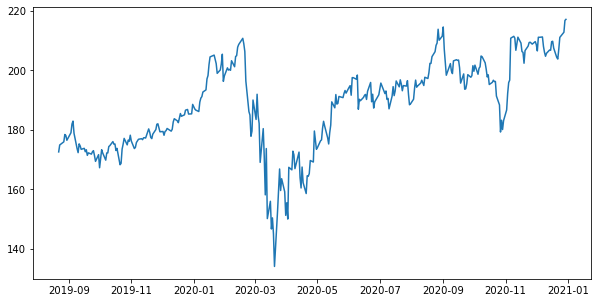

In [30]:
plt.figure(figsize=(10,5))
plt.plot(y_test)

In [31]:
# get predictions
y_pred = learner.predict(X_test)

In [32]:
ridge_error = mean_squared_error(y_test, y_pred)
sqrt(ridge_error)
print("R squared", r2_score(y_test, y_pred))
print("RMSE",sqrt(ridge_error))

R squared 0.8465995507427482
RMSE 5.888855480781263


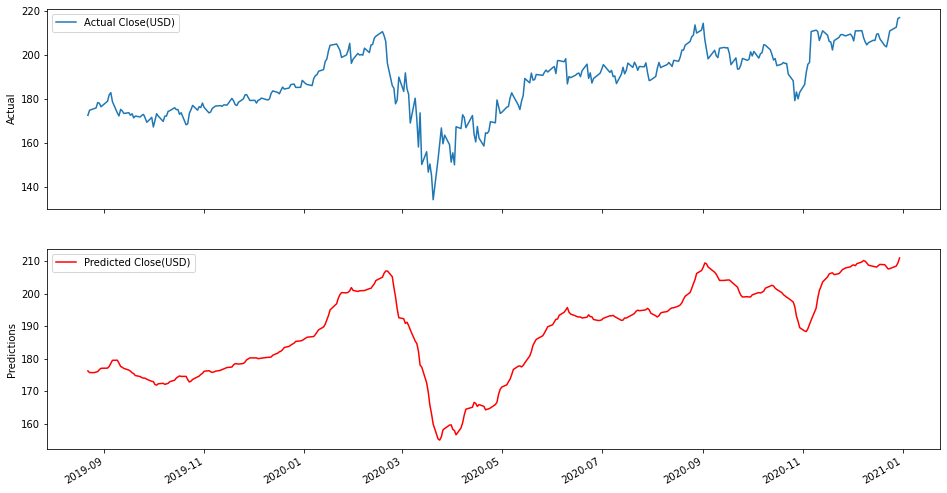

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
fig.autofmt_xdate()
ax1.plot(y_test,label="Actual Close(USD)")
ax2.plot(y_pred,label="Predicted Close(USD)", color='r')
ax1.set_ylabel("Actual")
ax2.set_ylabel("Predictions")
ax1.legend(loc='best')
ax2.legend(loc='best')

In [34]:
results = df_visa_test.copy()
results["actual"] = y_test
results["Predicted"] = y_pred

In [35]:
results.head()

,High,Low,Open,Close,Volume,Adj Close,EMA_10,actual,Predicted
Date,,,,,,,,,
2019-08-22,182.330002,178.610001,181.949997,180.089996,6659900.0,172.524597,175.350351,172.524597,176.273969
2019-08-23,180.500000,174.240005,179.550003,175.229996,7051900.0,174.848175,174.836578,174.848175,175.757489
2019-08-26,177.669998,175.350006,176.410004,177.589996,7754400.0,175.625946,174.838686,175.625946,175.759609
2019-08-27,179.190002,176.940002,178.320007,178.380005,4022100.0,175.911499,174.981824,175.911499,175.903501
2019-08-28,178.990005,176.029999,176.990005,178.669998,4401900.0,178.372879,175.150856,178.372879,176.073423


###  1 Buy & Hold Trading Strategy
 
* Position trading 
* Buy if we have next days predicted_value greater than todays close value and hold if already bought 
* Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [36]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(results)-1):
    if results['Predicted'][i+1] > results['actual'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / results['actual'][i])
            balance = int(amount % results['actual'][i])
            portfolio = stocks * results['actual'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',results['actual'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', 
                  stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * results['actual'][i]
            amount = portfolio + balance
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,
                  'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif results['Predicted'][i+1] < results['actual'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * results['actual'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,
                  'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')

Stock: 172.52459716796875 Action: Buy Portfolio: 9833.9 Stocks: 57 Balance_init: 166 total($) 9999.9


Stock: 174.84817504882812 Action: Bought--Holding Portfolio: 9966.35 Stocks: 57 Balance_init: 166 total($) 10132.35


Stock: 175.62594604492188 Action: Bought--Holding Portfolio: 10010.68 Stocks: 57 Balance_init: 166 total($) 10176.68


Stock: 175.9114990234375 Action: Bought--Holding Portfolio: 10026.96 Stocks: 57 Balance_init: 166 total($) 10192.96


Stock: 178.3728790283203 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10333.25


Stock: 178.02828979492188 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10333.25


Stock: 176.43333435058594 Action: Buy Portfolio: 10233.13 Stocks: 58 Balance_init: 100 total($) 10333.13


Stock: 178.96363830566406 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10479.89


Stock: 181.87794494628906 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104

Stock: 216.67434692382812 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 12248.34




In [100]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':results.Close[1:],
                                 'Predicted_Close_Price':y_pred[0][1:].values.tolist(),
                                 'Date': results.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,175.229996,175.798395,2019-08-23,Buy,57,9833.90117,10000.0
2,177.589996,175.800514,2019-08-26,Bought--Holding,57,9966.34511,10132.0
3,178.380005,175.944444,2019-08-27,Bought--Holding,57,10010.67979,10177.0
4,178.669998,176.114406,2019-08-28,Bought--Holding,57,10026.95544,10193.0
5,181.169998,176.703458,2019-08-29,Sell,0,0.00000,10333.0


<AxesSubplot:title={'center':'Total Amount'}>

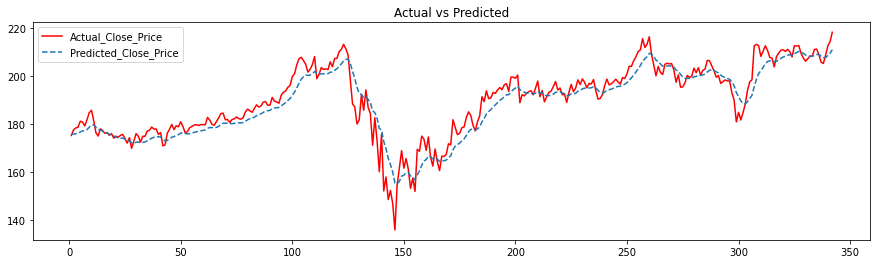

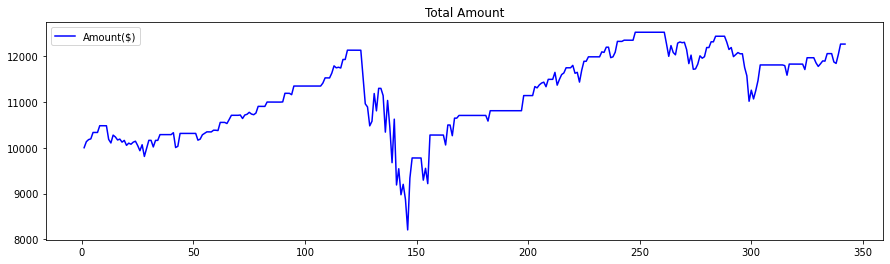

In [101]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-r','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-b'], 
                                            title = 'Total Amount')

In [102]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 12260.0 $
Profit_Percent: 122.6 %


In [103]:
Strategy_Result['Returns'] = Strategy_Result['Amount($)'].pct_change()

In [104]:
mean_returns = Strategy_Result['Returns'].mean()
sd = Strategy_Result['Returns'].std()
Sharpe_Ratio = np.sqrt(100)*(mean_returns)/sd
Sharpe_Ratio

0.39420160068581916

In [105]:
results.index= results['Date']

In [106]:
long_MA = results['actual'].rolling(window=20).mean()
results['Long_Moving_Avg'] = long_MA

In [107]:
short_MA  = results['actual'].rolling(window=5).mean()
results['Short_Moving_Avg'] = short_MA 

In [108]:
long_std= results['actual'].rolling(window=20).std()
results['Long_std'] = long_std

In [109]:
long_upper_band = ((long_MA) + (long_std)*0.75)
results['Long_Upper_Band'] = long_upper_band

In [110]:
long_lower_band = ((long_MA) - (long_std)*0.75)
results['Long_Lower_Band'] = long_lower_band

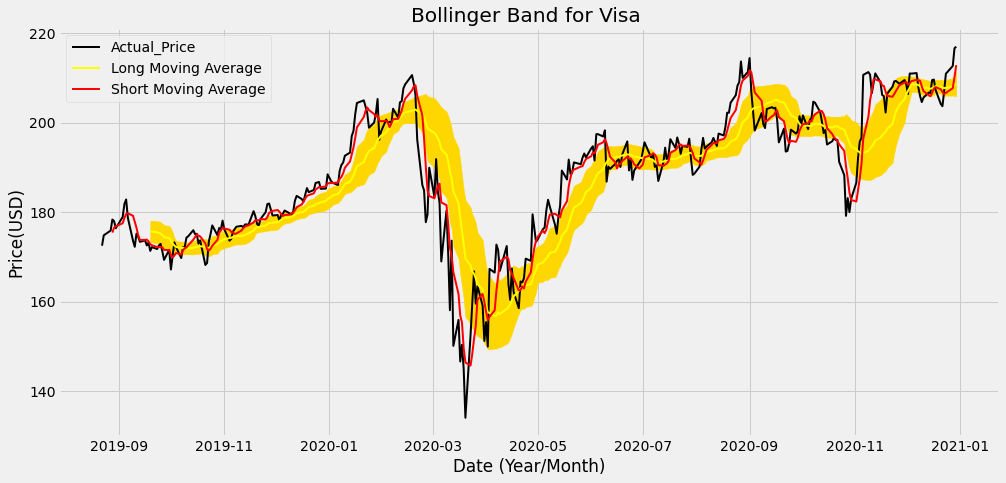

In [111]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
x_axis = results.index
ax.fill_between(x_axis, results['Long_Upper_Band'], results['Long_Lower_Band'], color='gold')
ax.plot(x_axis, results['actual'], color='black', lw=2, label = 'Actual_Price')
ax.plot(x_axis, results['Long_Moving_Avg'], color='yellow', lw=2, label = 'Long Moving Average')
ax.plot(x_axis, results['Short_Moving_Avg'], color='red', lw=2, label = 'Short Moving Average')

ax.set_title('Bollinger Band for Visa ')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()